`cred_sum_cc_all` - сумма кредитов по кредитным картам

`mfo_inqs_count_month` - количество запросов на кредиты в другие в МФО

`all_closed_creds_sum_all` - сумма всех закрытых кредитов

`bank_inqs_count_quarter` - количество запросов на кредиты в банки

`cred_max_overdue_max_ly` - максимальная просрочка за год

`all_active_creds_sum_all` - денежная сумма всех активных кредитов

`mfo_last_days_all` - Количество дней с последнего займа в МФО

`cred_sum_cc_ly` - Сумма лимитов кредитных карт, оформленных за последний год

`cred_sum_debt_all_all` - Сумма задолженности по всем кредитам

`all_closed_creds_sum_ly` - Сумма закрытых кредитов за последний год

`mfo_cred_mean_sum_3lm` - Средняя сумма МФО кредитов, выданных за последние 3 месяца

`delay_more_sum_all` - Количество просрочек более чем на 90 дней по всем кредитам

`all_creds_count_all` - Общее количество кредитов

`cred_day_overdue_all_sum_all` - Суммарное количество дней просрочки текущих активных кредитов

`cred_max_overdue_max_3lm` - Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца

`mfo_closed_count_ly` - Количество закрытых МФО кредитов, взятых за последний год

`cred_sum_overdue_cc_all` - Сумма просрочек по кредитным картам

`count_overdue_all_3lm` - Количество кредитов на просрочке, взятых за последние 3 месяца

`all_creds_count_lm` - Количество кредитов, взятых за последний месяц

`region` - регион подачи заявки

Переменные характеризующие клиента `work_code` - Профессия. 5 - рабочие профессии (слесарь, токарь). 3 - офисный работник (бухгалтер, программист). 1 - госслужащий (полицейский, медсестра)

`month_income` - доход

Целевые переменные: `approved` - 1 - одобрено, 0 - отказано.

# Первичный анализ данных

In [192]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");

RAND = 12345

In [193]:
df = pd.read_csv('train_new.csv')

In [194]:
df.head()

,Unnamed: 0,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,...,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,approved
0,0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,...,529,0.0,0,0.00,0,0,3,50000,46,0
1,1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,...,0,0.0,0,0.00,0,0,3,35000,17,0
2,2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,...,0,0.0,0,0.00,0,2,3,35000,58,0
3,3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,...,0,0.0,0,4923.97,0,0,5,35000,4,0
4,4,5498647,0.0,0,0,1,0.0,0,9999,0.0,...,0,0.0,0,0.00,0,0,5,35000,34,0


In [195]:
df = df.drop(['Unnamed: 0', 'order_id'], axis = 1)

In [196]:
df.head()

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,approved
0,0.0,0,40364,0,0.0,3000,560,0.0,0.0,0,...,529,0.0,0,0.00,0,0,3,50000,46,0
1,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,0,...,0,0.0,0,0.00,0,0,3,35000,17,0
2,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,0,...,0,0.0,0,0.00,0,2,3,35000,58,0
3,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,0,...,0,0.0,0,4923.97,0,0,5,35000,4,0
4,0.0,0,0,1,0.0,0,9999,0.0,0.0,0,...,0,0.0,0,0.00,0,0,5,35000,34,0


In [197]:
print(f'Train size = {df.shape}')

Train size = (23116, 23)


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cred_sum_cc_all               23116 non-null  float64
 1   mfo_inqs_count_month          23116 non-null  int64  
 2   all_closed_creds_sum_all      23116 non-null  int64  
 3   bank_inqs_count_quarter       23116 non-null  int64  
 4   cred_max_overdue_max_ly       23116 non-null  float64
 5   all_active_creds_sum_all      23116 non-null  int64  
 6   mfo_last_days_all             23116 non-null  int64  
 7   cred_sum_cc_ly                23116 non-null  float64
 8   cred_sum_debt_all_all         23116 non-null  float64
 9   all_closed_creds_sum_ly       23116 non-null  int64  
 10  mfo_cred_mean_sum_3lm         23116 non-null  float64
 11  delay_more_sum_all            23116 non-null  int64  
 12  all_creds_count_all           23116 non-null  int64  
 13  c

In [199]:
df.describe()

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,approved
count,2.311600e+04,23116.000000,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,2.311600e+04,2.311600e+04,...,23116.000000,23116.000000,23116.000000,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000
mean,4.424794e+04,1.284262,1.653574e+05,3.760642,4.070925e+03,1.284212e+05,2615.988925,10672.104919,8.414683e+04,3.006949e+04,...,259.105944,1107.137568,3.474087,4.878172e+03,0.118576,1.080637,3.433250,39363.189998,47.632203,0.314458
std,1.006016e+05,2.373415,4.788942e+05,5.057107,2.689042e+04,3.890718e+05,4228.621029,37246.943546,3.054724e+05,1.021166e+05,...,768.039823,7073.931364,9.202313,3.793714e+04,0.466854,2.137757,1.370812,13887.644526,27.615823,0.464310
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,3.000000e+03,0.000000,0.000000e+00,2.000000e+03,13.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,35000.000000,25.000000,0.000000
50%,5.000000e+03,0.000000,3.083450e+04,2.000000,0.000000e+00,1.500000e+04,83.500000,0.000000,5.000000e+03,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000,35000.000000,46.000000,0.000000
75%,4.972685e+04,2.000000,1.357758e+05,5.000000,3.000000e+03,7.500000e+04,2070.500000,0.000000,3.496056e+04,2.000000e+04,...,70.000000,0.000000,3.000000,0.000000e+00,0.000000,1.000000,5.000000,50000.000000,70.000000,1.000000
max,5.739786e+06,25.000000,3.030997e+07,67.000000,1.914581e+06,1.200000e+07,9999.000000,878000.000000,1.150825e+07,4.929320e+06,...,15327.000000,673495.420000,344.000000,2.878197e+06,10.000000,48.000000,5.000000,65000.000000,99.000000,1.000000


In [200]:
df.nunique()

cred_sum_cc_all                  3401
mfo_inqs_count_month               26
all_closed_creds_sum_all        13583
bank_inqs_count_quarter            54
cred_max_overdue_max_ly          3734
all_active_creds_sum_all        10705
mfo_last_days_all                1639
cred_sum_cc_ly                    660
cred_sum_debt_all_all            9669
all_closed_creds_sum_ly          4246
mfo_cred_mean_sum_3lm            4459
delay_more_sum_all                125
all_creds_count_all               181
cred_day_overdue_all_sum_all     2318
cred_max_overdue_max_3lm         1157
mfo_closed_count_ly               114
cred_sum_overdue_cc_all          2780
count_overdue_all_3lm              11
all_creds_count_lm                 32
work_code                           5
month_income                       18
region                             90
approved                            2
dtype: int64

In [201]:
df.work_code.unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [202]:
df['work_code'] = df['work_code'].astype(object)

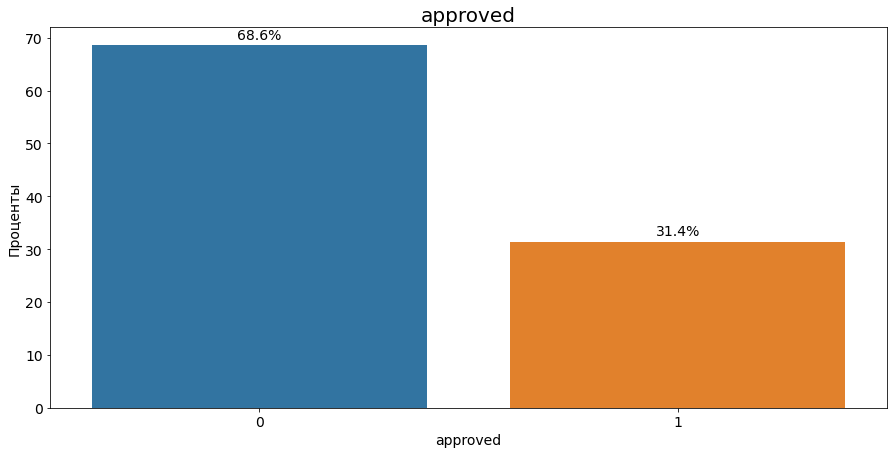

In [203]:
# нормирование на размер датасета
norm_target = (df
               .approved
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('approved', fontsize=20)

plt.xlabel('approved', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

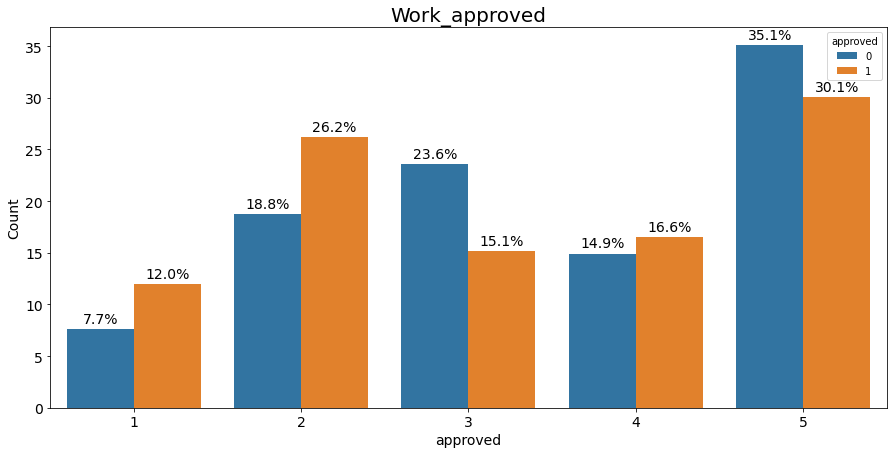

In [218]:
plt.figure(figsize=(15, 7))

work_app = (df.groupby(['approved'])['work_code']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('work_code'))

ax = sns.barplot(x="work_code", y="percentage", hue="approved", data=work_app)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Work_approved', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('approved', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

# Проверка гипотез

In [204]:
from scipy import stats as st

In [205]:
df_approved_1 = df.query('approved == 1')
df_approved_0 = df.query('approved == 0')

Проверка гипотез

**H0 : Нулевая гипотеза**

**H1 : Альтернативная гипотеза** 

`month_income` - доход

H0 : Средний доход у обоих выборок не отличается 

H1 : Средний доход у обоих выборок отличается 

In [206]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['month_income'], df_approved_0['month_income'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['month_income'].mean()

P-value: 1.3620446815980342e-194
Отвергаем нулеву гипотезу

Сравнение средних


approved
0    37558.623083
1    43297.289861
Name: month_income, dtype: float64

Люди, которым одобрили кредит, в среднем получают больше

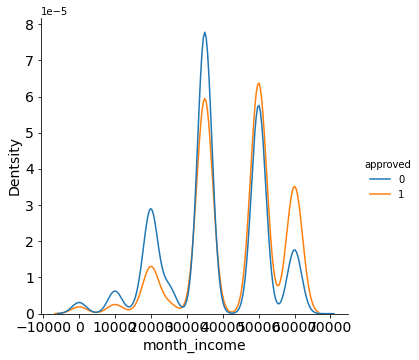

In [207]:
sns.displot(df, x='month_income', hue='approved', kind="kde", common_norm=False)

plt.xlabel('month_income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Из графика хорошо видно, как с увеличением зарплаты, увеличивается количество хороших заемщиков

In [208]:
df.groupby('approved')['month_income'].agg({'mean', 'median'})

,mean,median
approved,,
0,37558.623083,35000.0
1,43297.289861,50000.0


`all_creds_count_all` - Общее количество кредитов

H0 : Общее количество кредитов не отличается для обоих выборок 
    
H1 : Общее количество кредитов отличается

In [209]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['all_creds_count_all'], df_approved_0['all_creds_count_all'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['all_creds_count_all'].mean()

P-value: 2.770410370138931e-258
Отвергаем нулеву гипотезу

Сравнение средних


approved
0     7.887171
1    19.070574
Name: all_creds_count_all, dtype: float64

Видимо для банка люди берущие чаще кредиты, являются более надежными

`delay_more_sum_all` - Количество просрочек более чем на 90 дней по всем кредитам

H0 : Среднее количество просрочек более чем на 90 дней не отличается
    
H1 : Среднее количество просрочек более чем на 90 дней отличается 

In [210]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['delay_more_sum_all'], df_approved_0['delay_more_sum_all'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['delay_more_sum_all'].mean()

P-value: 2.7814611110875703e-234
Отвергаем нулеву гипотезу

Сравнение средних


approved
0    6.454786
1    2.097125
Name: delay_more_sum_all, dtype: float64

Логично, что для банка хороший заемщик, тот который платит во время

`all_closed_creds_sum_all` - сумма всех закрытых кредитов

H0 : Сумма всех закрытых кредитов не отличается для обоих выборок
    
H1 : Сумма всех закрытых кредитов отличается для обоих выборок 

In [211]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['all_closed_creds_sum_all'], df_approved_0['all_closed_creds_sum_all'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['all_closed_creds_sum_all'].mean()

P-value: 3.3333360729535827e-99
Отвергаем нулеву гипотезу

Сравнение средних


approved
0    116558.606424
1    271742.530197
Name: all_closed_creds_sum_all, dtype: float64

Так как люди чаще берут кредиты, то у сумма всех закрытых кредитов у них больше

`cred_sum_debt_all_all` - Сумма задолженности по всем кредитам

H0 : Сумма задолженности по всем кредитам не отличается для обоих выборок
    
H1 : Сумма задолженности по всем кредитам отличается для обоих выборок

In [212]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['cred_sum_debt_all_all'], df_approved_0['cred_sum_debt_all_all'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['cred_sum_debt_all_all'].mean()

P-value: 2.5582985874737523e-168
Отвергаем нулеву гипотезу

Сравнение средних


approved
0     37336.460635
1    186197.170845
Name: cred_sum_debt_all_all, dtype: float64

Опять же возможно связано с большой разницей в количестве кредитов. Хотя мне кажется, что средняя сума задолженностей могла бы быть и меньше, особенно у хороших заемщиков

`cred_max_overdue_max_ly` - максимальная просрочка за год

H0 : Максимальная просрочка за год не отличается для обоих выборок
    
H1 : Максимальная просрочка за год отличается для обоих выборок

In [213]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['cred_max_overdue_max_ly'], df_approved_0['cred_max_overdue_max_ly'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['cred_max_overdue_max_ly'].mean()

P-value: 3.5876851652351904e-06
Отвергаем нулеву гипотезу

Сравнение средних


approved
0    4470.336032
1    3200.177498
Name: cred_max_overdue_max_ly, dtype: float64

Хорошие заемщики в среднем имеют меньшую максимальную просрочку за год 

`cred_sum_overdue_cc_all` - Сумма просрочек по кредитным картам

H0 : Сумма просрочек по кредитным картам не отличается для обоих выборок
    
H1 : Сумма просрочек по кредитным картам отличается для обоих выборок

In [214]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['cred_sum_overdue_cc_all'], df_approved_0['cred_sum_overdue_cc_all'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['cred_sum_overdue_cc_all'].mean()

P-value: 2.217356556684369e-59
Отвергаем нулеву гипотезу

Сравнение средних


approved
0    6786.754930
1     717.309495
Name: cred_sum_overdue_cc_all, dtype: float64

`mfo_closed_count_ly`- Количество закрытых МФО кредитов, взятых за последний год

H0 : Количество закрытых МФО кредитов, взятых за последний год не отличается для обоих выборок

H1 : Количество закрытых МФО кредитов, взятых за последний год отличается для обоих выборок

In [215]:
alpha = 0.05
results = st.ttest_ind(df_approved_1['mfo_closed_count_ly'], df_approved_0['mfo_closed_count_ly'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['mfo_closed_count_ly'].mean()

P-value: 1.1397184753011914e-295
Отвергаем нулеву гипотезу

Сравнение средних


approved
0    1.45649
1    7.87261
Name: mfo_closed_count_ly, dtype: float64

Все-таки хорошие заемщики взяли больше кредитов, поэтому и закрыли больше, но также не стоит забывать о том, что именно этого мы и ждем от хороших заемщиков

`cred_day_overdue_all_sum_all` - Суммарное количество дней просрочки текущих активных кредитов

H0 : Суммарное количество дней просрочки текущих активных кредитов не отличается для обоих выборок

H1 : Суммарное количество дней просрочки текущих активных кредитов отличается для обоих выборок

In [216]:
alpha = 0.05
results = st.ttest_ind(df_approved_0['cred_day_overdue_all_sum_all'], df_approved_1['cred_day_overdue_all_sum_all'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
  print('Отвергаем нулеву гипотезу')
else: 
  print('Не получилось отвергнуть нулевую гипотезу')
print('')
print('Сравнение средних')
df.groupby('approved')['cred_day_overdue_all_sum_all'].mean()

P-value: 0.0
Отвергаем нулеву гипотезу

Сравнение средних


approved
0    369.257336
1     18.967121
Name: cred_day_overdue_all_sum_all, dtype: float64

In [217]:
df.groupby(['approved'])['cred_day_overdue_all_sum_all'].sum()

approved
0    5851621
1     137872
Name: cred_day_overdue_all_sum_all, dtype: int64

Плохие заемщики на то они плохие, потому что платят не во время

Переменные характеризующие клиента `work_code` - Профессия. 5 - рабочие профессии (слесарь, токарь). 3 - офисный работник (бухгалтер, программист). 1 - госслужащий (полицейский, медсестра)

In [219]:
df.columns

Index(['cred_sum_cc_all', 'mfo_inqs_count_month', 'all_closed_creds_sum_all',
       'bank_inqs_count_quarter', 'cred_max_overdue_max_ly',
       'all_active_creds_sum_all', 'mfo_last_days_all', 'cred_sum_cc_ly',
       'cred_sum_debt_all_all', 'all_closed_creds_sum_ly',
       'mfo_cred_mean_sum_3lm', 'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm', 'work_code',
       'month_income', 'region', 'approved'],
      dtype='object')

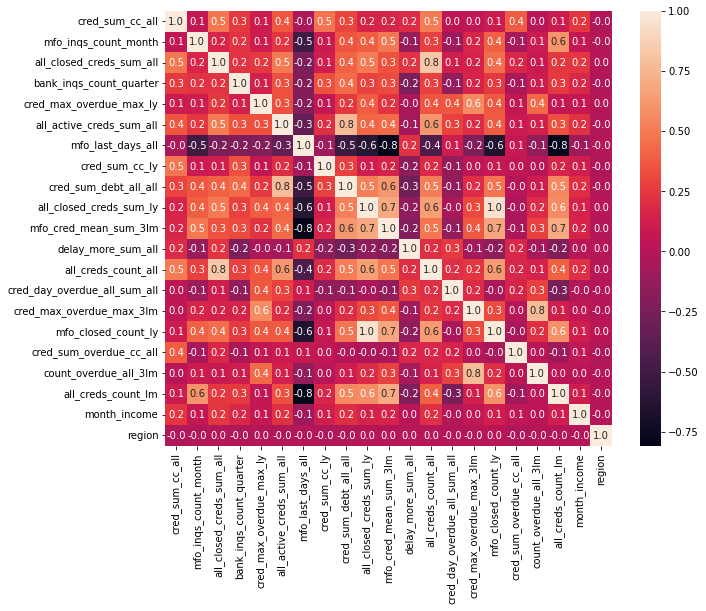

In [220]:
num_cols = ['cred_sum_cc_all', 'mfo_inqs_count_month',
       'all_closed_creds_sum_all', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'all_active_creds_sum_all',
       'mfo_last_days_all', 'cred_sum_cc_ly', 'cred_sum_debt_all_all',
       'all_closed_creds_sum_ly', 'mfo_cred_mean_sum_3lm',
       'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm',
       'month_income', 'region']

plt.figure(figsize=(10, 8))

sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

# Подготовка данных

In [221]:
df = df.drop(['all_closed_creds_sum_ly', 'all_closed_creds_sum_all', 'all_active_creds_sum_all', 'region'], axis = 1)

Удалим столбцы, которые сильно между собой коррелируют, а также столбец `region`

In [222]:
df.columns

Index(['cred_sum_cc_all', 'mfo_inqs_count_month', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'mfo_last_days_all', 'cred_sum_cc_ly',
       'cred_sum_debt_all_all', 'mfo_cred_mean_sum_3lm', 'delay_more_sum_all',
       'all_creds_count_all', 'cred_day_overdue_all_sum_all',
       'cred_max_overdue_max_3lm', 'mfo_closed_count_ly',
       'cred_sum_overdue_cc_all', 'count_overdue_all_3lm',
       'all_creds_count_lm', 'work_code', 'month_income', 'approved'],
      dtype='object')

In [223]:
num_cols = ['cred_sum_cc_all', 'mfo_inqs_count_month', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'mfo_last_days_all', 'cred_sum_cc_ly',
       'cred_sum_debt_all_all', 'mfo_cred_mean_sum_3lm', 'delay_more_sum_all',
       'all_creds_count_all', 'cred_day_overdue_all_sum_all',
       'cred_max_overdue_max_3lm', 'mfo_closed_count_ly',
       'cred_sum_overdue_cc_all', 'count_overdue_all_3lm',
       'all_creds_count_lm', 'month_income']

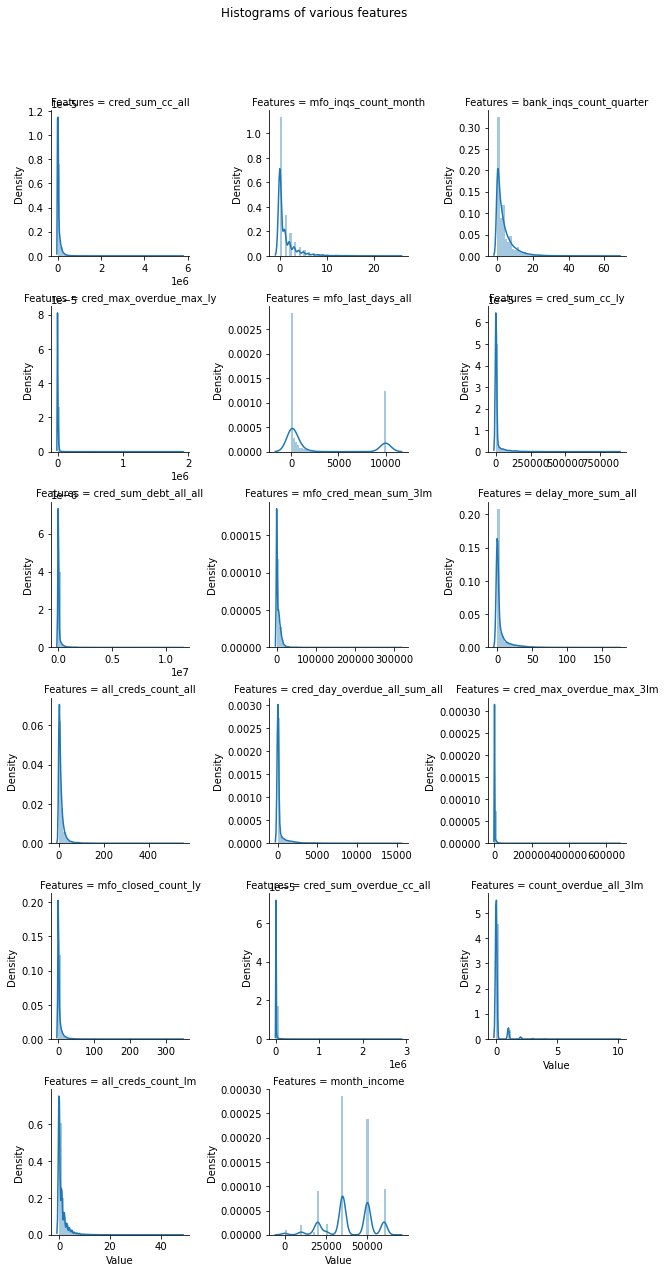

In [224]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

Большинство переменных распределено не нормально, поэтому их нужно прологарифмировать

In [225]:
for i in ['cred_sum_cc_all', 'mfo_inqs_count_month', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'mfo_last_days_all', 'cred_sum_cc_ly',
       'cred_sum_debt_all_all', 'mfo_cred_mean_sum_3lm', 'delay_more_sum_all',
       'all_creds_count_all', 'cred_day_overdue_all_sum_all',
       'cred_max_overdue_max_3lm', 'mfo_closed_count_ly',
       'cred_sum_overdue_cc_all', 'count_overdue_all_3lm',
       'all_creds_count_lm', 'month_income']:
    df[i] = np.log(df[i]+1)

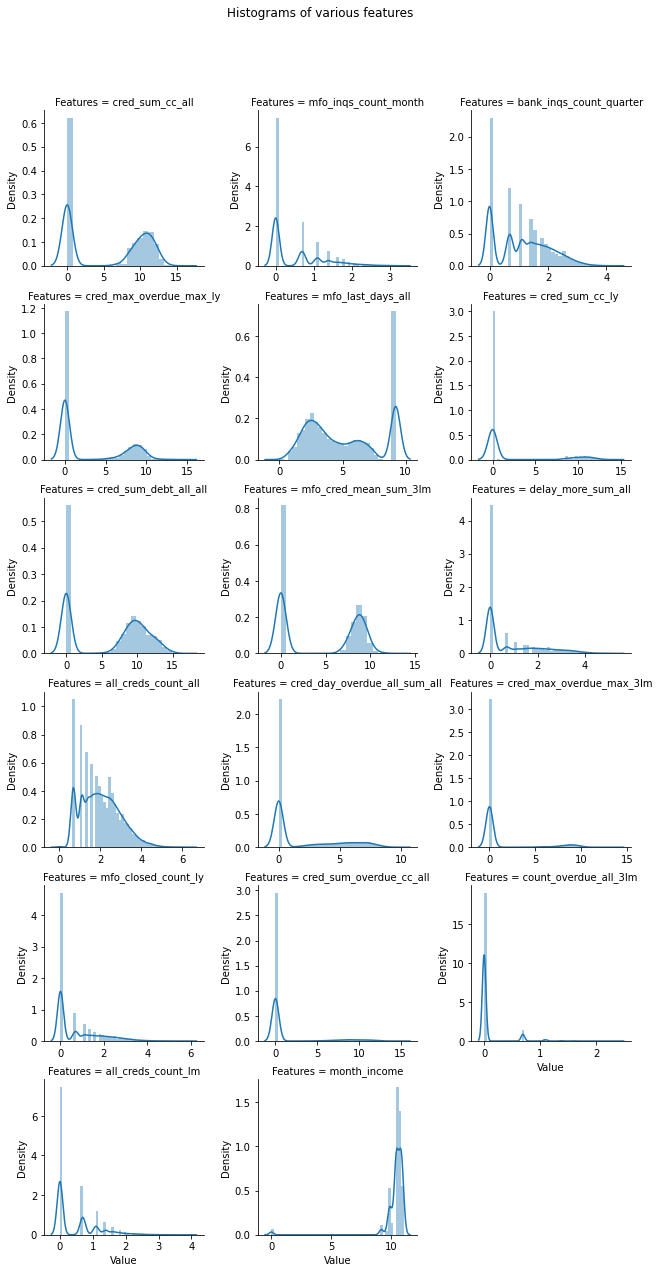

In [226]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [227]:
cat_cols = ['work_code']

In [228]:
num_cols = list(df.dtypes[df.dtypes == float].index) + list(df.dtypes[df.dtypes == int].index)[1:-1]

In [229]:
df_label = pd.get_dummies(df, columns=cat_cols,
                          drop_first=True)

# Обучение модели

In [230]:
X = df_label.drop('approved', axis=1)
y = df_label['approved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

In [231]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [232]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.9445792402618491
precision: 0.7666345226615237
recall: 0.8750687947165657
f1: 0.8172706245181188
logloss: 4.249430182027637


In [233]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

In [234]:
metrics

,Baseline_LR
roc-auc,0.944579
precision,0.766635
recall,0.875069
f1,0.817271
logloss,4.249430


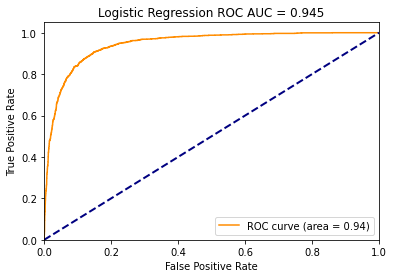

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [236]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,scoring='roc_auc', cv=cv, verbose=2)

In [237]:
#grid_cv.fit(X_train, y_train)

In [238]:
#print(grid_cv.best_score_)
#print(grid_cv.best_params_)

In [239]:
best_params = {'C': 750.75, 
               'l1_ratio': 0.25,
               'max_iter': 400, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [240]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [241]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.9451005659988936
precision: 0.7702768334142788
recall: 0.8728673637864612
f1: 0.8183694530443756
logloss: 4.207592453988857


In [242]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]

In [243]:
metrics

,Baseline_LR,Grid_LR
roc-auc,0.944579,0.945101
precision,0.766635,0.770277
recall,0.875069,0.872867
f1,0.817271,0.818369
logloss,4.249430,4.207592


Качество метрик улучшилось хоть и не много

Если кредитная организация хочет минимизировать риск выдать кредит плохо заемщику, нужно стараться максимизировать метрику precision

А если кредитная организация хочет привлечь как можно больше кредиторов, нужно стараться максимизировать метрику recall


Так же стоит добавить, что без удаления сильно коррелирующих столбцов, значение метрик было ниже

# Просмотр наиболее важных параметров

In [244]:
lr_gr.coef_

array([[ 0.06740441, -0.12812609,  0.49608357, -0.03510777,  0.18675284,
         0.07669375,  0.13431813,  0.09444214, -0.66157534,  1.57451631,
        -0.67184814, -0.01602144,  0.52446344, -0.20856212, -1.19253617,
         0.40182453,  0.06942578, -0.1326352 , -0.19663909, -0.16083426,
        -0.08365164]])

In [245]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)

In [246]:
feature_imp

,feature,imp
9,all_creds_count_all,1.574516
12,mfo_closed_count_ly,0.524463
2,bank_inqs_count_quarter,0.496084
15,all_creds_count_lm,0.401825
4,mfo_last_days_all,0.186753
6,cred_sum_debt_all_all,0.134318
7,mfo_cred_mean_sum_3lm,0.094442
5,cred_sum_cc_ly,0.076694
16,month_income,0.069426
0,cred_sum_cc_all,0.067404
